# Laboration - Covid-19

## Uppgift 1 - uppvärmning covid-19 data
Börja med att manuellt läsa Excel-filerna och de olika bladen i varje dokument. Använd därefter Pandas för att
läsa in bladet: "Veckodata Riket" i covid19-filen.

### a) Gör initial dataanalys för att snabbt få en överblick över datasetet. Använd metoder som ex. info(), describe(), value_counts(), head(), columns, index för att snabbt få en överblick.


In [80]:
import pandas as pd

covid_veckodata_riket = pd.read_excel("Data/Folkhalsomyndigheten_Covid19.xlsx", sheet_name="Veckodata Riket")

covid_veckodata_riket


,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.000000
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.000000
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.000000
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.000000
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,2021,37,6266,60,137,1145764,11039,24,7823,52,5.0,14807,1426.599976
85,2021,38,4298,41,101,1150062,11080,21,7844,40,3.9,14847,1430.400024
86,2021,39,4241,41,82,1154303,11121,17,7861,37,3.6,14884,1434.000000
87,2021,40,4141,40,81,1158444,11161,15,7876,42,4.0,14926,1438.099976


In [81]:
covid_veckodata_riket.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              89 non-null     int64  
 1   veckonummer                     89 non-null     int64  
 2   Antal_fall_vecka                89 non-null     int64  
 3   Antal_fall_100000inv_vecka      89 non-null     int64  
 4   Antal_fall_100000inv_14dagar    89 non-null     int64  
 5   Kum_antal_fall                  89 non-null     int64  
 6   Kum_fall_100000inv              89 non-null     int64  
 7   Antal_nyaintensivvårdade_vecka  89 non-null     int64  
 8   Kum_antal_intensivvårdade       89 non-null     int64  
 9   Antal_avlidna_vecka             89 non-null     int64  
 10  Antal_avlidna_milj_inv_vecka    89 non-null     float64
 11  Kum_antal_avlidna               89 non-null     int64  
 12  Kum_antal_avlidna_milj_inv      89 non

In [82]:
covid_veckodata_riket.describe()


,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
count,89.000000,89.000000,89.000000,89.000000,89.000000,8.900000e+01,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,2020.460674,25.584270,13061.865169,126.011236,251.584270,4.885261e+05,4709.325843,88.606742,4261.741573,167.910112,16.233708,8923.303371,860.923595
std,0.501275,13.713637,14210.652869,137.184472,272.989003,4.559136e+05,4391.041264,83.646662,2609.965149,204.302952,19.765609,5126.703711,493.286226
min,2020.000000,1.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,14.000000,2179.000000,21.000000,46.000000,7.279100e+04,705.000000,14.000000,2491.000000,17.000000,1.600000,5621.000000,544.299988
50%,2020.000000,25.000000,4608.000000,44.000000,100.000000,3.380260e+05,3273.000000,59.000000,3638.000000,82.000000,7.900000,8135.000000,787.700012
75%,2021.000000,36.000000,25405.000000,246.000000,485.000000,1.044862e+06,10067.000000,153.000000,7348.000000,235.000000,22.799999,14416.000000,1388.900024
max,2021.000000,53.000000,46177.000000,447.000000,869.000000,1.162506e+06,11200.000000,289.000000,7886.000000,664.000000,64.300003,14944.000000,1439.800049


In [83]:
covid_veckodata_riket.value_counts()

år    veckonummer  Antal_fall_vecka  Antal_fall_100000inv_vecka  Antal_fall_100000inv_14dagar  Kum_antal_fall  Kum_fall_100000inv  Antal_nyaintensivvårdade_vecka  Kum_antal_intensivvårdade  Antal_avlidna_vecka  Antal_avlidna_milj_inv_vecka  Kum_antal_avlidna  Kum_antal_avlidna_milj_inv
2020  6            1                 0                           0                             1               0                   0                               0                          0                    0.0                           0                  0.000000                      1
      51           46177             447                         869                           384203          3720                187                             3825                       645                  62.5                          8780               850.200012                    1
2021  18           33680             324                         664                           1018946         9817              

In [84]:
covid_veckodata_riket.columns

Index(['år', 'veckonummer', 'Antal_fall_vecka', 'Antal_fall_100000inv_vecka',
       'Antal_fall_100000inv_14dagar', 'Kum_antal_fall', 'Kum_fall_100000inv',
       'Antal_nyaintensivvårdade_vecka', 'Kum_antal_intensivvårdade',
       'Antal_avlidna_vecka', 'Antal_avlidna_milj_inv_vecka',
       'Kum_antal_avlidna', 'Kum_antal_avlidna_milj_inv'],
      dtype='object')

In [85]:
covid_veckodata_riket.index

RangeIndex(start=0, stop=89, step=1)

### b) Slå ihop kolumnerna "år" och "veckonummer" till en kolumn med namn "Vecka" med följande format:

 Vecka

 2020v6

 2020v7

 ...
 
 2021v40


In [86]:
covid_veckodata_riket.insert(loc = 0, value = covid_veckodata_riket["år"].astype(str) + 'v' + covid_veckodata_riket["veckonummer"].astype(str), column="Vecka")
covid_veckodata_riket

,Vecka,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020v6,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.000000
1,2020v7,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.000000
2,2020v8,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.000000
3,2020v9,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.000000
4,2020v10,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,2021v37,2021,37,6266,60,137,1145764,11039,24,7823,52,5.0,14807,1426.599976
85,2021v38,2021,38,4298,41,101,1150062,11080,21,7844,40,3.9,14847,1430.400024
86,2021v39,2021,39,4241,41,82,1154303,11121,17,7861,37,3.6,14884,1434.000000
87,2021v40,2021,40,4141,40,81,1158444,11161,15,7876,42,4.0,14926,1438.099976


För deluppgifterna c-f, använd både Seaborn och Plotly express. För Seaborn, använd subplots så du får 2x2
grid med graferna.

### c) Rita en linjediagram som visar avlidna fall per vecka från 2020v6 till nu.

### d) Rita en linjediagram som visar nya fall per vecka från 2020v6 till nu.

### e) Rita linjediagram av både avlidna fall per vecka och nya fall per vecka i samma fönster från 2020v6 till nu.

### f) Rita linjediagram av kumulativt antal fall från 2020v6 till nu.


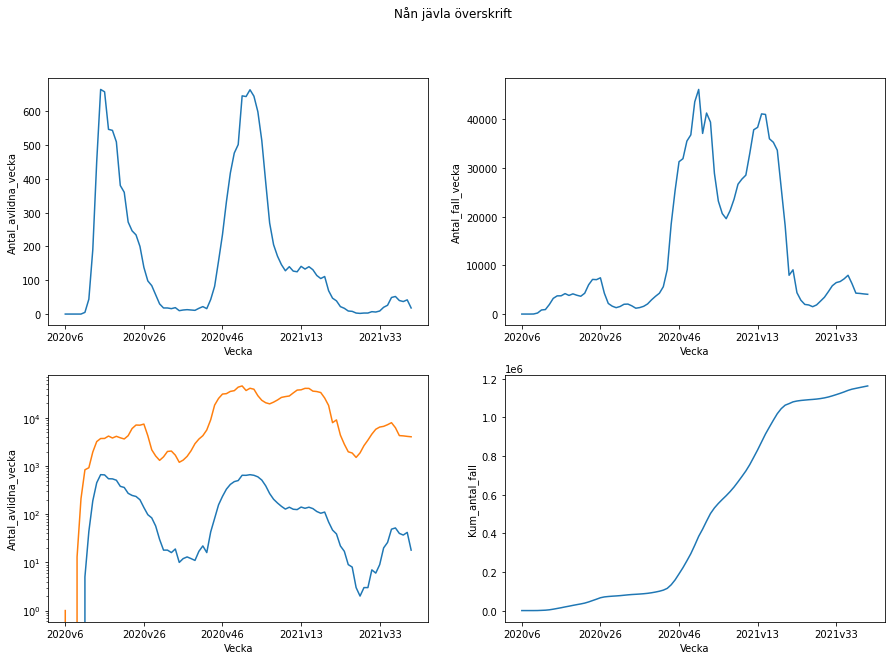

In [87]:
import seaborn as sb
import matplotlib.pyplot as plt


#fig, axes = plt.subplots(2, 2)
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(15, 10)
fig.suptitle("Nån jävla överskrift")

sb.lineplot(data=covid_veckodata_riket, x="Vecka", y="Antal_avlidna_vecka", ax=ax[0][0])
ax[0, 0].set_xticks( range(0, 100, 20) )


sb.lineplot(data=covid_veckodata_riket, x="Vecka", y="Antal_fall_vecka", ax=ax[0][1])
ax[0, 1].set_xticks( range(0, 100, 20) )


sb.lineplot(data=covid_veckodata_riket, x="Vecka", y="Antal_avlidna_vecka", ax=ax[1][0])
sb.lineplot(data=covid_veckodata_riket, x="Vecka", y="Antal_fall_vecka", ax=ax[1][0])
ax[1, 0].set_xticks( range(0, 100, 20) )
ax[1, 0].set(yscale="log")

sb.lineplot(data=covid_veckodata_riket, x="Vecka", y="Kum_antal_fall", ax=ax[1][1])
ax[1, 1].set_xticks( range(0, 100, 20) );


#fig.show()




In [88]:
import plotly_express as px
fig = px.line(covid_veckodata_riket, x="Vecka", y="Antal_avlidna_vecka", title="Avlidna per vecka")
fig.show()

In [89]:
fig = px.line(covid_veckodata_riket, x="Vecka", y="Antal_fall_vecka", title="Fall per vecka") 
fig.show()

In [90]:
fig = px.line(covid_veckodata_riket, x="Vecka", y=["Antal_avlidna_vecka", "Antal_fall_vecka"], title="Antal fall och antal avlidna per vecka", log_y=True) 

fig.show()

In [91]:
fig = px.line(covid_veckodata_riket, x="Vecka", y="Kum_antal_fall", title="Ackumulerat antal fall per vecka") 
fig.show()

## Uppgift 2 - uppvärmning vaccindata

I uppgifterna nedan ska du använda dig av datasetet vaccin och bladet Vaccinerade kommun och ålder.
Använd Plotly express för att rita diagrammen nedan för de uppgifter som kräver diagram. Använd Pandas för
att svara på frågor om datasetet.

### a) Hur många län finns representerade i datasetet?


In [96]:
vaccinerade_riket = pd.read_excel("Data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name="Vaccinerade kommun och ålder")

antal_regioner = vaccinerade_riket["Län_namn"].unique().size

print(f"Det finns {antal_regioner} regioner i Sverige.")

Det finns 21 regioner i Sverige.


### b) Hur många kommuner finns representerade i datasetet?

In [93]:
antal_kommuner = vaccinerade_rikett["Kommun_namn"].unique().size
print(f"Det finns {antal_kommuner} kommuner i Sverige.")

Det finns 290 kommuner i Sverige.


### c) Hur stor är befolkningen som är representerad i datasetet?

In [115]:
befolkning_över_16 = vaccinerade_riket["Befolkning"].sum()
print(f"Befolning över 16 år är {befolkning_över_16:,}.".replace(',', ' '))

Befolning över 16 år är 8 541 497.


 ### d) Beräkna hur många barn under 16 år det finns i Sverige. Du får leta upp statistik på hur stor totala befolkningen är i Sverige.


In [113]:
tot_befolkning = 10427296 # Augusti 2021 egentligen skulle det vara för oktober. Kanske borde man extrapolera till oktober då skulle det öka ca 10 000 personer. 
# Källa: https://www.scb.se/hitta-statistik/statistik-efter-amne/befolkning/befolkningens-sammansattning/befolkningsstatistik/pong/tabell-och-diagram/manadsstatistik--riket/befolkningsstatistik-2021/

barn_under_16 = tot_befolkning - befolkning_över_16
print(f"Antalet barn under 16 är {barn_under_16:,}.".replace(',', ' '))

Antalet barn under 16 är 1 885 799.


### e) Rita stapeldiagram för andel med minst 1 dos per län och andel färdigvaccinerade per län

In [144]:
vaccinerade_län = vaccinerade_riket.groupby("Län_namn").sum()
vaccinerade_län.drop(["Län", "Kommun"], axis="columns", inplace=True)

vaccinerade_län["Andel minst 1 dos"] = vaccinerade_län["Antal minst 1 dos"] /  vaccinerade_län["Befolkning"] * 100
vaccinerade_län["Andel färdigvaccinerade"] = vaccinerade_län["Antal färdigvaccinerade"] /  vaccinerade_län["Befolkning"] * 100

fig = px.bar(vaccinerade_län, x=vaccinerade_län.index, y=["Andel minst 1 dos", "Andel färdigvaccinerade"], barmode='group')
fig.show()

### f) Rita ett stapeldiagram med län i x-axeln och staplar för befolkning > 16år, antal minst 1 dos och antal färdigvaccinerade.


In [146]:

fig = px.bar(vaccinerade_län, x=vaccinerade_län.index, y=["Antal minst 1 dos", "Antal färdigvaccinerade"], barmode='group')
fig.show()
